## OCR with Pytesseract and OpenCV

In [235]:
# Import libraries we need, including `Numpy`, `OpenCV`, `Pytesseract` and `Matplotlib`
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt
import time

### Read image

In [236]:
# Read image
image_path = 'text2.jpg'
image = cv2.imread(image_path)

`OpenCV` uses **BRG** format when reading images while `Matplotlib` uses **RGB**, so we need to convert **BRG** format to **RGB** format to get original image.

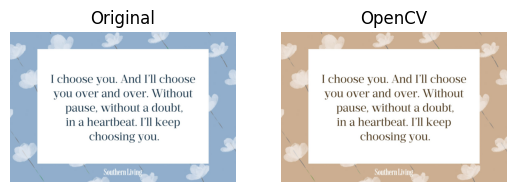

In [237]:
# Convert BRG to RGB
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
# Turn off axis
plt.axis('off')
plt.title('Original')

# Show the image OpenCV read
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.axis('off')
plt.title('OpenCV')
plt.show()

### Preprocessing befor using tesseract

Before performing image recognition, we need to adjust the images using `OpenCV` to ensure more accurate recognition results.

<function matplotlib.pyplot.show(close=None, block=None)>

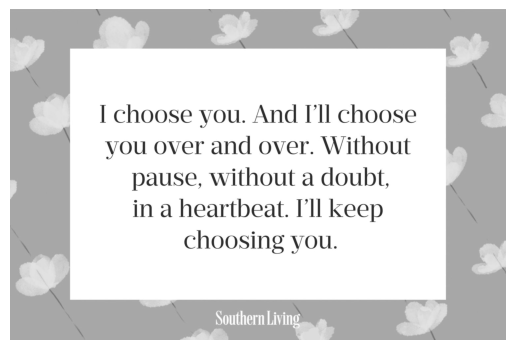

In [238]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = get_grayscale(image)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

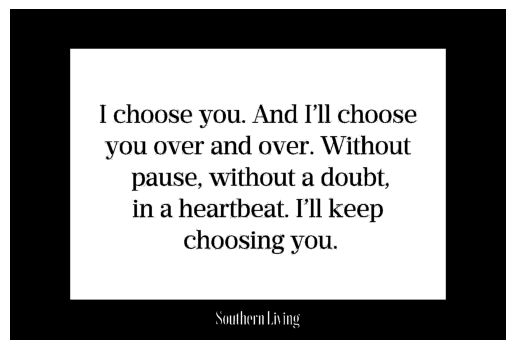

In [239]:
# Convert to a binary image using the Otsu method to automatically select the optimal threshold.
def thresholding(image):
    return cv2.threshold(gray_image, 244, 255, cv2.THRESH_BINARY)

_,thresh_image = thresholding(gray_image)
plt.imshow(thresh_image, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

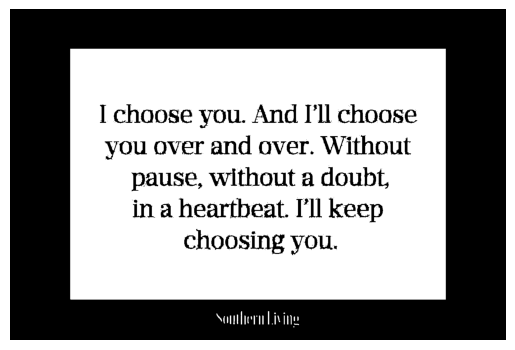

In [240]:
#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

opening_image = opening(thresh_image)
plt.imshow(opening_image, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

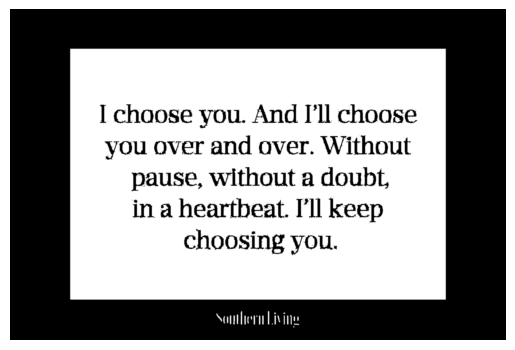

In [241]:
# remove noise
def remove_noise(image):
    return cv2.GaussianBlur(image, (3, 3), 0)

blurred_image = remove_noise(opening_image)
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

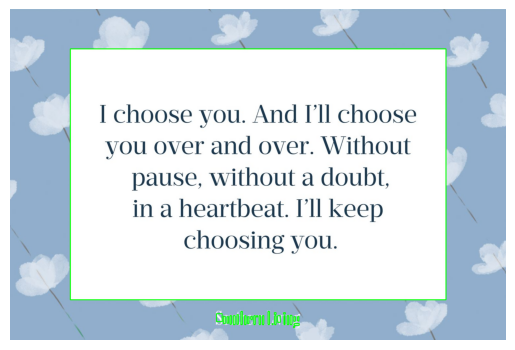

In [284]:
# Find the outermost contours (cv2.RETR_EXTERNAL), using pixel comparison with adjacent pixels (cv2.CHAIN_APPROX_NONE)
contours, hierachy = cv2.findContours(opening_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

image_copy = original_image.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_copy, (x,y) , (x+w, y+h), (0, 255, 0), 2)
    cropped = opening_image[y : y + h, x : x + w]

plt.imshow(image_copy, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

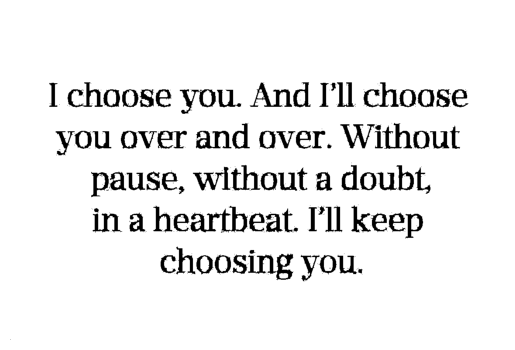

In [285]:
plt.imshow(cropped, cmap='gray')
plt.axis('off')
plt.show

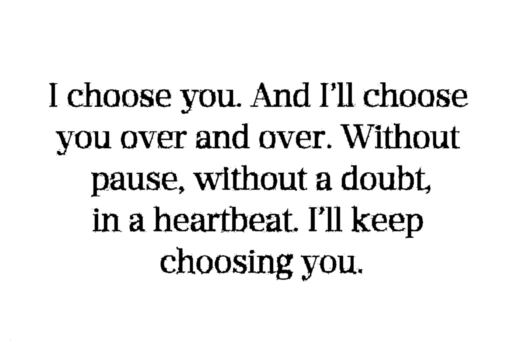

In [286]:
blure = remove_noise(cropped)
plt.imshow(blure, cmap='gray')
plt.axis('off')
plt.show()

In [287]:
# Set OCR Engine Mode and Page Segmentation Mode
custom_config = r'--oem 3 --psm 6'

# Use Tesseract to perform text recognition
text = pytesseract.image_to_string(blure, config=r'--oem 3 --psm 6' )
print(text)

I choose you. And I'll choase
you over and over. Without
pause, without a doubt,
in a heartbeat. I'll keep
choosing you.



In [ ]:
#Getting boxes around text
hImg, wImg= thresh_image.shape
boxes = pytesseract.image_to_boxes(original_image)
for b in boxes.splitlines():
    b = b.split(' ')
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    img_with_boxes = cv2.rectangle(original_image, (x, hImg-y), (w, hImg-h), (0, 255, 0), 2)

plt.imshow(img_with_boxes)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

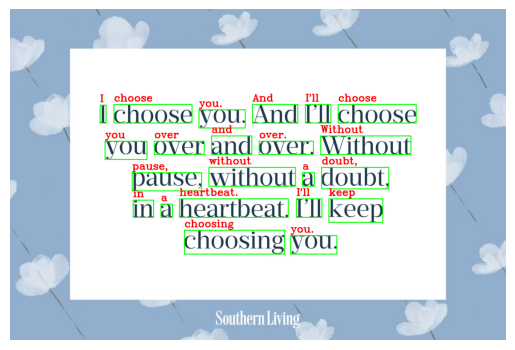

In [139]:
#Getting boxes around text word
img_copy = original_image.copy()
n_boxes = pytesseract.image_to_data(img_copy)
for index,n_b in enumerate(n_boxes.splitlines()):
    if index != 0:
        n_b = n_b.split()
        if len(n_b) == 12:
            x,y,w,h = int(n_b[6]), int(n_b[7]), int(n_b[8]), int(n_b[9])
            cv2.rectangle(img_copy, (x, y), (w+x, y+h), (0, 255, 0), 2)
            cv2.putText(img_copy, n_b[11], (x, y-10), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)


plt.imshow(img_copy)
plt.axis('off')
plt.show     

## Code demo

In [281]:
# convert to RGB
def convert_RGB(image):
    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_RGB

# get grayscale image
def get_grayscale(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image_gray

#thresholding
def thresholding(image):
    image_thresh = cv2.threshold(image, 244, 255, cv2.THRESH_BINARY)
    return image_thresh

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((3,3),np.uint8)
    image_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return image_opening

#contour cutting
        
# remove noise
def remove_noise(image):
    image_blurred = cv2.GaussianBlur(image, (3, 3), 0)
    return image_blurred

# text detection
def text_detection(path):
    img = cv2.imread(path)
    
    RGB_img = convert_RGB(img)
    
    gray_img = get_grayscale(RGB_img)
    
    _,thresh_img = thresholding(gray_img)
    
    opening_img = opening(thresh_img)

    #contour cutting
    contours, hierachy = cv2.findContours(opening_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cropped = opening_img[y : y + h, x : x + w]
    
    blurred_img = remove_noise(cropped)
    
    custom_config = r'--oem 3 --psm 6' 
    text =  pytesseract.image_to_string(blurred_img, config=custom_config)
    print(text)


t = time.time()
text_detection('text2.jpg')
print(f'{time.time() - t:.4f}')

I choose you. And I'll choase
you over and over. Without
pause, without a doubt,
in a heartbeat. I'll keep
choosing you.

0.2895


In [282]:
t = time.time()
text_detection('text.png')
print(f'{time.time() - t:.4f}')

Hello, here is some text without a meaning. This text should show
what a printed text will look like at this place. If you read this text,
you will get no information. Really? Is there no information? Is there
8 difference between this text and some nonsense like “Huardest gef-
burn”? Kjift - not at all! A blind tart like this gives you information
of the look. This text should contain all letters of the alphabet and
it should be written in of the original language. There is no need for
special content, but the length of words should match the language.

Hello, here is some text without a meaning. This text should show
what a printed text will look like at this place. If you read this text,
you will get no information. Really? Is there no information? Is there a
differance between this text and some nonsense like “Huardest gefburn”?
selected font, how the letters are written and an impression of the look.
This text should contain all letters of the alphabet and it should be
written in 